In [207]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

#### **Exercise 1:**
Create a function returning the first N terms of the tailor series of the function without using the sympy series function.

In [202]:
def taylor(N):
    x=sp.symbols('x')
    a = sp.symbols('a')
    func = sp.sin(x)
    n = 0
    series = 0
    for n in range(N):
        series = series + sp.diff(func, x, n).subs(x,a)*(x-a)**n/sp.factorial(n)
    return series + sp.O(sp.Pow(x-a, N))
taylor(10)

#need to change the code so that 'sp.Pow(x-a, N)' doesnt get evaluated

sin(a) + (-a + x)*cos(a) - (-a + x)**2*sin(a)/2 - (-a + x)**3*cos(a)/6 + (-a + x)**4*sin(a)/24 + (-a + x)**5*cos(a)/120 - (-a + x)**6*sin(a)/720 - (-a + x)**7*cos(a)/5040 + (-a + x)**8*sin(a)/40320 + (-a + x)**9*cos(a)/362880 + O(a**10 + a**9*x + a**8*x**2 + a**7*x**3 + a**6*x**4 + a**5*x**5 + a**4*x**6 + a**3*x**7 + a**2*x**8 + a*x**9 + x**10, a, x)

In [170]:
sp.sin(x).series(x, x0=sp.symbols('a'), n=10)

sin(a) + (-a + x)*cos(a) - (-a + x)**2*sin(a)/2 - (-a + x)**3*cos(a)/6 + (-a + x)**4*sin(a)/24 + (-a + x)**5*cos(a)/120 - (-a + x)**6*sin(a)/720 - (-a + x)**7*cos(a)/5040 + (-a + x)**8*sin(a)/40320 + (-a + x)**9*cos(a)/362880 + O((-a + x)**10, (x, a))

#### **Exercise 2:**

Write a matrix multiplication function using lists ("manually", using the matrix multiplication formula) and another one using numpy arrays (call matmul function). Time them both. 

In [17]:
def matrix_mult(m1,m2):
    prodM = []
    for i in range(len(m1)):
        row = m1[i]
        nRow = []
        for j in range(len(m2[0])):
            y = 0
            for k in range(len(row)):
                rowE = row[k]
                colE = m2[k][j]
                y = y + rowE*colE
            nRow.append(y)
        prodM.append(nRow)
    return prodM

m1 = [[1,0,0], [1,2,6],[1,1,1]]   
m2 = [[7,1,1], [1,2,6],[1,4,7]]

sp.Matrix(matrix_mult(m1,m2))

Matrix([
[ 7,  1,  1],
[15, 29, 55],
[ 9,  7, 14]])

In [18]:
sp.Matrix(np.matmul(m1, m2))

Matrix([
[ 7,  1,  1],
[15, 29, 55],
[ 9,  7, 14]])

In [19]:
%timeit matrix_mult(m1,m2)
%timeit np.matmul(m1, m2)

9.55 µs ± 670 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
9.86 µs ± 1.33 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


#### **Execrise 3:**

Consider the following example. Change functions in it to plot something different from `sin` in each panel. Add x and y labels to each panel. Experiment till this looks nice enough for an article. Save the output. 

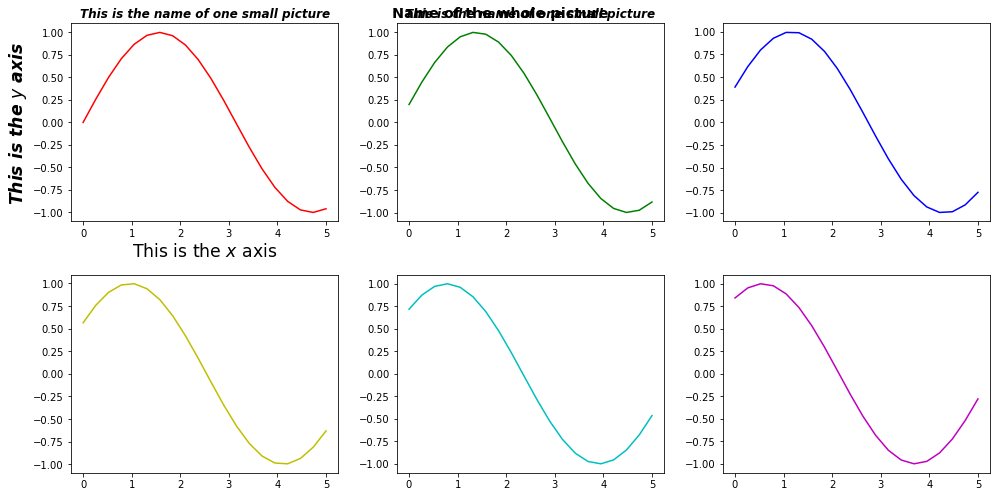

In [22]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(0,5,20)
y1 = np.sin(x)
y2 = np.sin(x + 0.2)
y3 = np.sin(x + 0.4)
y4 = np.sin(x + 0.6)
y5 = np.sin(x + 0.8)
y6 = np.sin(x + 1)

# now we decide the actual figure size in inches
fig = plt.figure(figsize=(14,7))

plt.suptitle('Name of the whole picture',fontweight='bold', fontsize='x-large')
plt.subplots_adjust(hspace=0.3, top=0.8) 
# create subplots 231 means make a 2x3 grid and this is the first plot
plt.subplot(231)
#these are here to show that you can do the same here as for a single plot
plt.title('This is the name of one small picture',fontsize = 'large',fontstyle='italic',fontweight='bold')
plt.ylabel('This is the $y$ axis',fontsize = 'xx-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('This is the $x$ axis',fontsize = 'xx-large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y1,color='r')

plt.subplot(232)

plt.plot(x,y2,color='g')
plt.subplot(233)
plt.plot(x,y3,color='b')
plt.subplot(234)
plt.plot(x,y4,color='y')
plt.subplot(235)
plt.plot(x,y5,color='c')
plt.subplot(236)
plt.plot(x,y6,color='m')
# removed extra white space
plt.tight_layout()
#plt.show()

#### **Exercise 4:**
Plot the recaman sequence in the following way:

Add a semi-circular arc from $a_{n}$ to $a_{n-1}$.

Alternate the arcs to be above and below the x-axis according to whether
    n is even or odd.

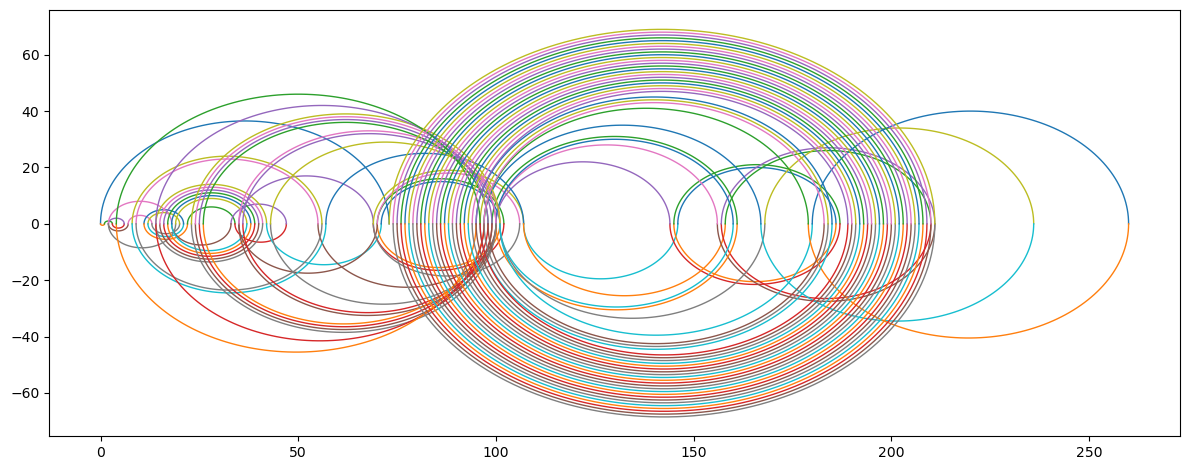

In [285]:
def Recaman(N):
    a = [0]
    b = {0}
    for n in range(1, N):
        if a[n-1] - n > 0 and (a[n-1] - n) not in b:
            a.append(a[n-1] - n)
            b.add(a[n-1] + n)
        else:
            a.append(a[n-1] + n)
            b.add(a[n-1] + n)
    return a

def semi_circle(center, theta, radius, n):
    if n%2 == 0:
        x = center[0] + radius * np.cos(np.radians(theta))
        y = center[1] + radius * np.sin(np.radians(theta))
        return ax.plot(x,y,linestyle='-',linewidth=1)
    else:
        x = center[0] + radius * np.cos(np.radians(theta))
        y = (center[1] + radius * np.sin(np.radians(theta)))
        return ax.plot(x,-y,linestyle='-',linewidth=1)

#aspect ratio
w, h = plt.figaspect(0.4)
fig = plt.figure('Sin plots',figsize=(w,h))
ax = plt.axes()

N = 139
a = Recaman(N)

for n in range(N):
    center = ((a[n-1]+a[n])/2 , 0)
    theta = np.linspace(theta_range[0], theta_range[1], 100)
    radius = np.abs((a[n-1]-a[n])/2)
    semi_circle(center, theta, radius, n)

plt.tight_layout()

#### **Exercise5:**

Plot a rainbow. Use your imagination and google to make it beautiful.

#### **Exercise6**

Plot a nice-looking 3-D torus. Do this 3 times with different styles. 